In [16]:
pip install yfinance pandas statsmodels arch matplotlib

Note: you may need to restart the kernel to use updated packages.


In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from arch import arch_model
import matplotlib.pyplot as plt

In [18]:
# Download financial data for Wipro (WIPRO.NS)
ticker = 'MARICO.NS'
data = yf.download(ticker, start='2010-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [19]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,51.744499,52.264671,45.874012,50.431690,42.005531,1589952
2010-01-05,51.447262,52.462830,50.877552,51.174789,42.624481,863722
2010-01-06,51.744499,51.744499,50.530769,50.828011,42.335632,1746573
2010-01-07,51.026169,51.249100,49.936291,50.332611,41.923000,631259
2010-01-08,50.530769,50.753700,50.035370,50.134453,41.757950,342275


In [20]:
# Save the data to an Excel file
output_file = 'Marico_Financial_Data.xlsx'
data.to_excel(output_file, engine='openpyxl')

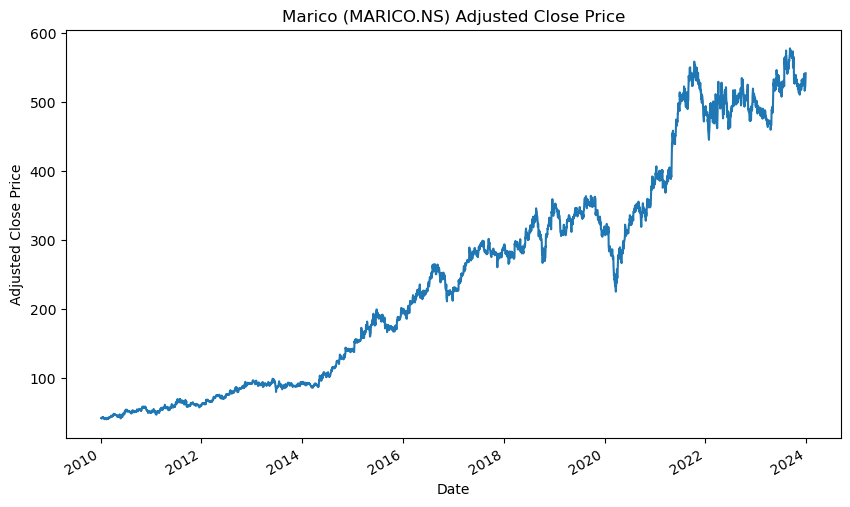

In [21]:
# Plot the adjusted close price
plt.figure(figsize=(10, 6))
data['Adj Close'].plot(title='Marico (MARICO.NS) Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

In [22]:

# Calculate returns
data['Return'] = data['Adj Close'].pct_change().dropna()

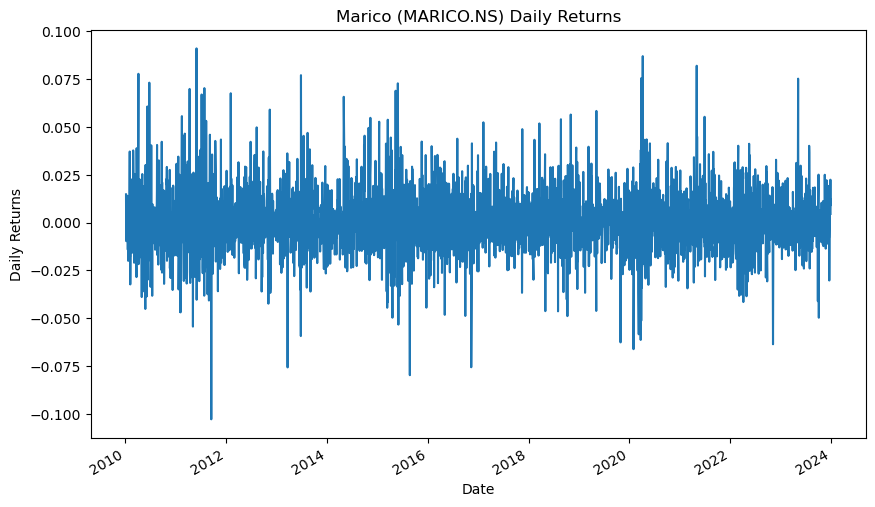

In [23]:
# Plot the returns
plt.figure(figsize=(10, 6))
data['Return'].plot(title='Marico (MARICO.NS) Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()

In [24]:
# Drop NaN values from returns
returns = data['Return'].dropna()

# Check for ARCH effects using the ARCH-LM test
arch_test = sm.stats.diagnostic.het_arch(returns)
print(f'ARCH Test: {arch_test}')

ARCH Test: (94.68127895405082, 6.286441552418865e-16, 9.7047556234072, 3.741462449040259e-16)


In [25]:
# Fit a GARCH(1,1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
res = model.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.17241652979879e+18
Iteration:      2,   Func. Count:     18,   Neg. LLF: 55488238.54086517
Iteration:      3,   Func. Count:     30,   Neg. LLF: 5399.118143641423
Iteration:      4,   Func. Count:     39,   Neg. LLF: 14486.158506424497
Iteration:      5,   Func. Count:     49,   Neg. LLF: 970691574.3150765
Iteration:      6,   Func. Count:     55,   Neg. LLF: -3121.2040255736465
Iteration:      7,   Func. Count:     62,   Neg. LLF: -9349.5443078662
Iteration:      8,   Func. Count:     68,   Neg. LLF: -8780.196086701762
Iteration:      9,   Func. Count:     74,   Neg. LLF: -9283.78542416867
Iteration:     10,   Func. Count:     80,   Neg. LLF: -9390.58612663392
Iteration:     11,   Func. Count:     85,   Neg. LLF: -9390.612884439568
Iteration:     12,   Func. Count:     90,   Neg. LLF: -9390.611082979154
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9390.612884403743
            Iterati

D:\Python\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002687. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


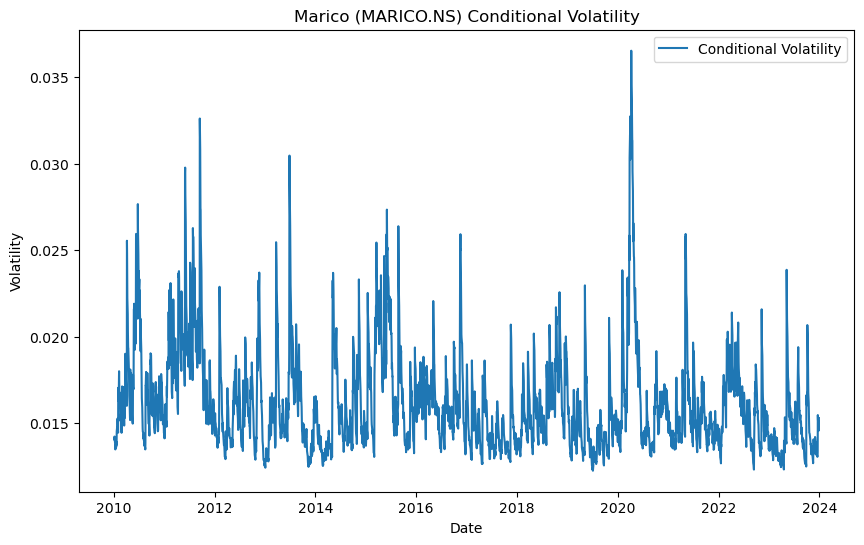

In [26]:
# Plot the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(res.conditional_volatility, label='Conditional Volatility')
plt.title('Marico (MARICO.NS) Conditional Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [27]:
# Forecast volatility for the next three months (90 days)
forecast = res.forecast(horizon=90)
volatility = forecast.variance[-1:] ** 0.5
print(volatility)

                h.01      h.02      h.03     h.04      h.05      h.06  \
Date                                                                    
2023-12-29  0.014869  0.014984  0.015091  0.01519  0.015281  0.015366   

                h.07      h.08      h.09      h.10  ...     h.81      h.82  \
Date                                                ...                      
2023-12-29  0.015445  0.015517  0.015585  0.015648  ...  0.01648  0.016481   

                h.83      h.84      h.85      h.86      h.87      h.88  \
Date                                                                     
2023-12-29  0.016481  0.016482  0.016482  0.016482  0.016482  0.016483   

                h.89      h.90  
Date                            
2023-12-29  0.016483  0.016483  

[1 rows x 90 columns]


In [28]:
# Extract the forecasted volatility values
forecasted_volatility = volatility.values.flatten()

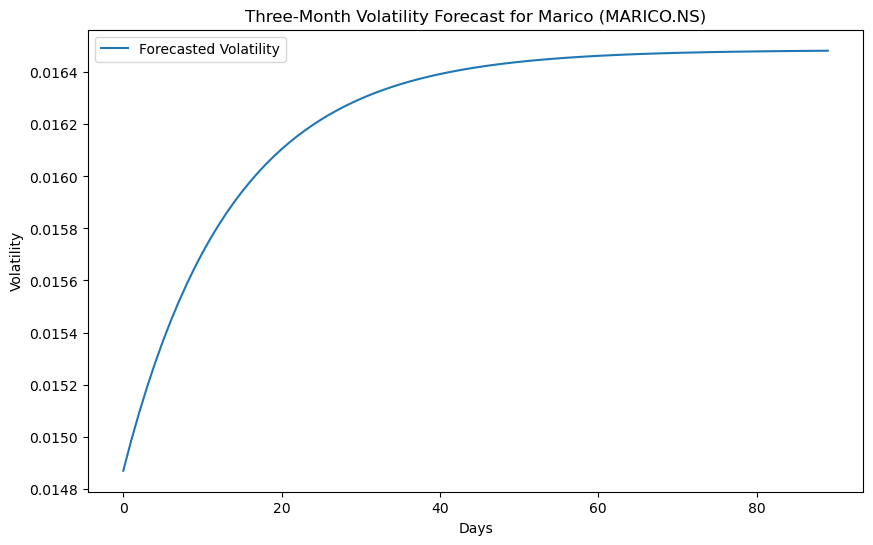

In [29]:
# Plot volatility forecast
plt.figure(figsize=(10, 6))
plt.plot(volatility.values.T.flatten(), label='Forecasted Volatility')
plt.title('Three-Month Volatility Forecast for Marico (MARICO.NS)')
plt.xlabel('Days')
plt.ylabel('Volatility')
plt.legend()
plt.show()